**Problem Statement:**
Predict house prices using property features such as size, bedrooms, and location.

**Dataset:**
House Price Prediction Dataset (https://www.kaggle.com/harlfoxem/housesalesprediction)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


**Data Exploratory Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


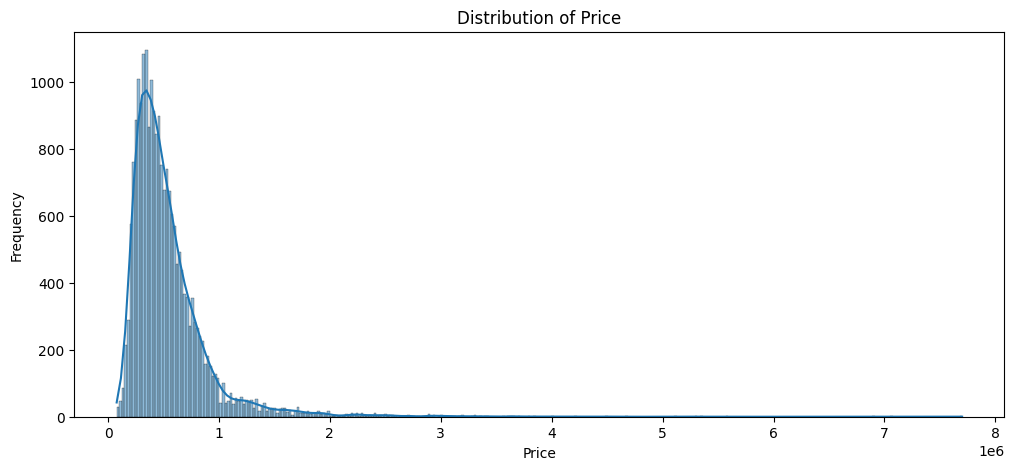

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='bedrooms', ylabel='count'>

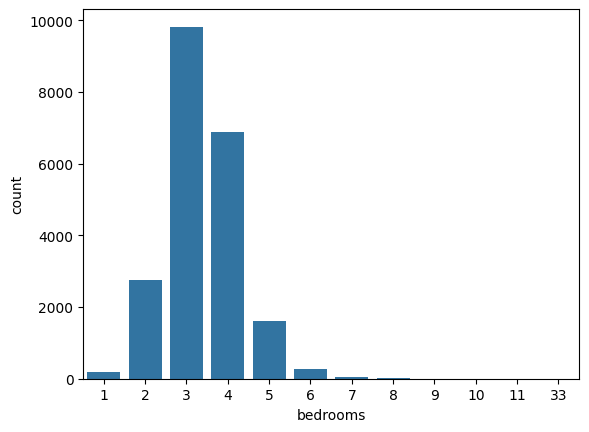

In [ ]:
sns.countplot(data=df, x='bedrooms')

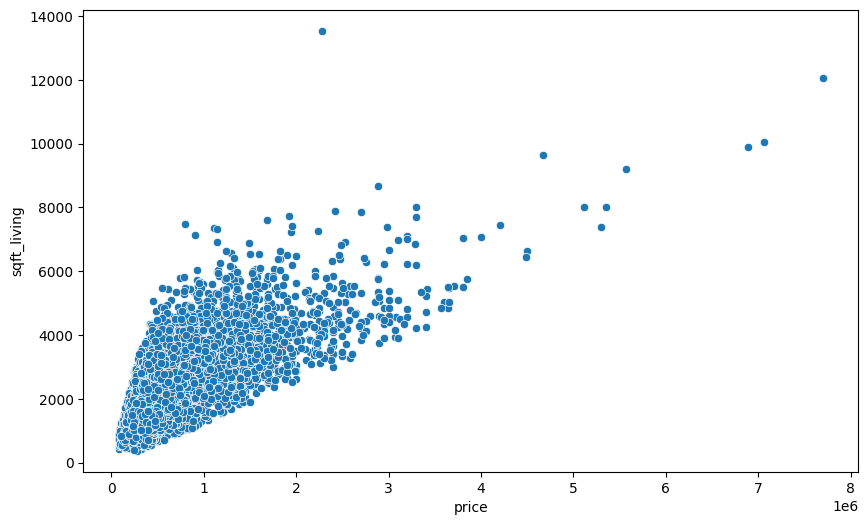

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

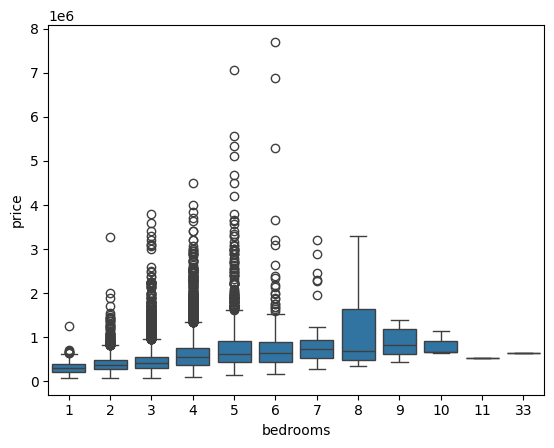

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

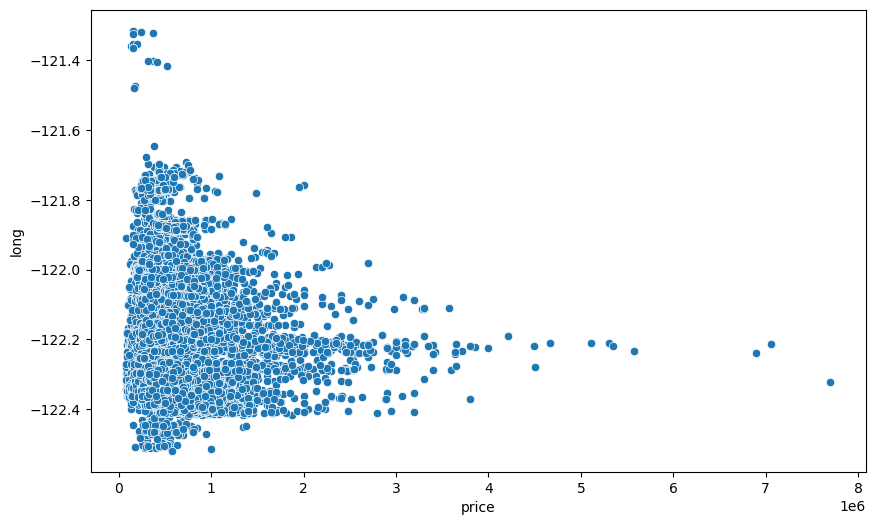

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)
plt.show()

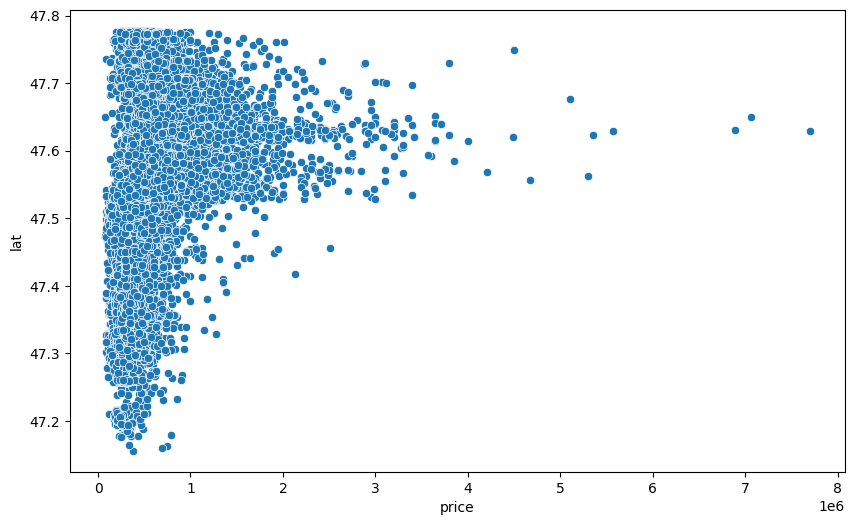

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)
plt.show()

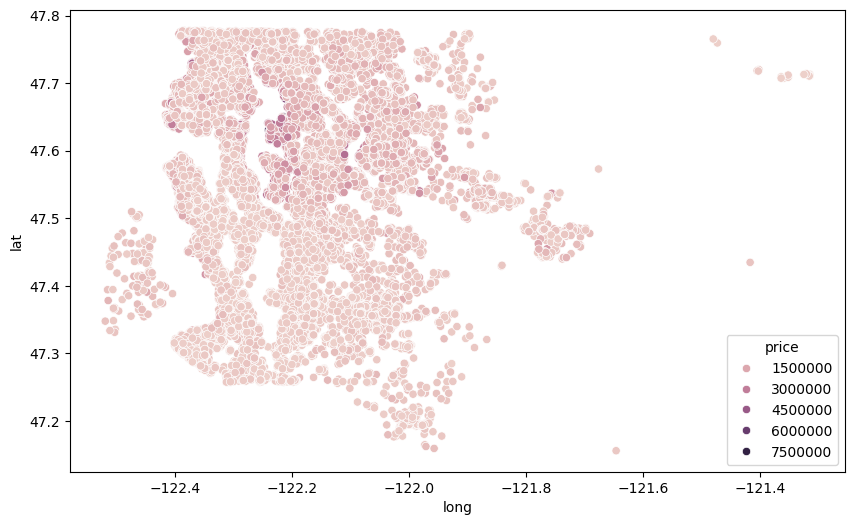

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df, hue='price')
plt.show()

<Axes: xlabel='long', ylabel='lat'>

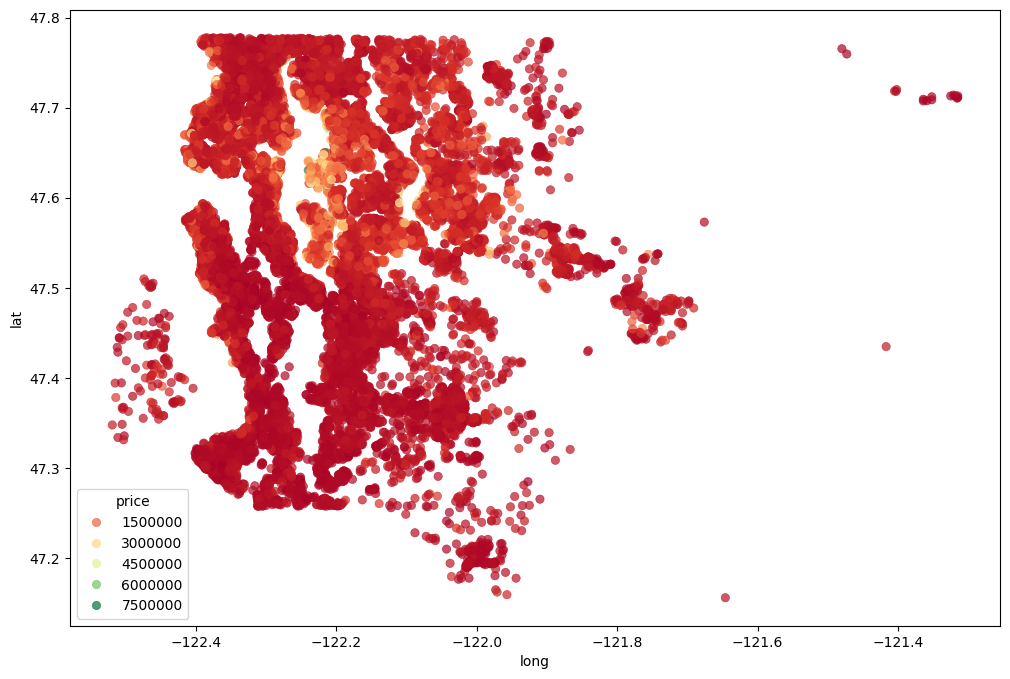

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=df,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.7)

lets remove the houses whose the highest prices.

In [ ]:
len(df)*0.02

431.94

In [ ]:
top_432_ids = df.sort_values('price', ascending=False).iloc[:432].index
df2 = df.drop(index=top_432_ids)
df2.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,12,2014


In [ ]:
len(df)-len(df2)

432

<Axes: xlabel='long', ylabel='lat'>

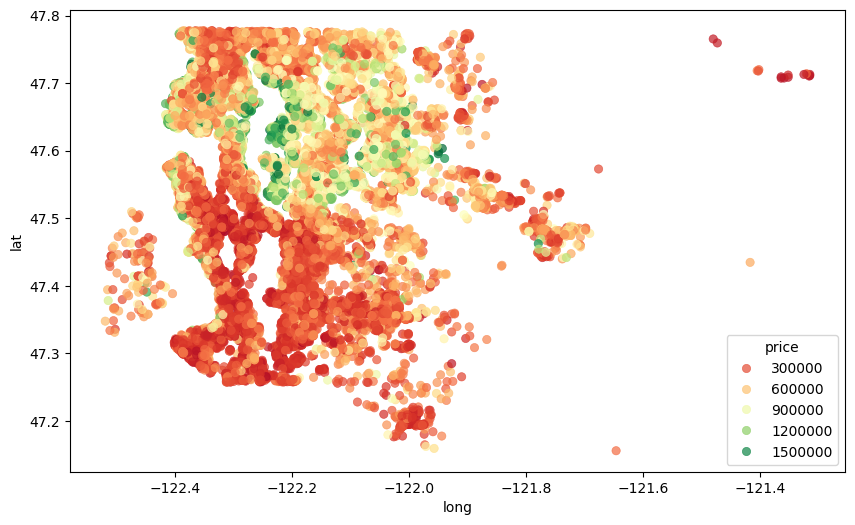

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',
                data=df2,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.7)

<Axes: xlabel='waterfront', ylabel='price'>

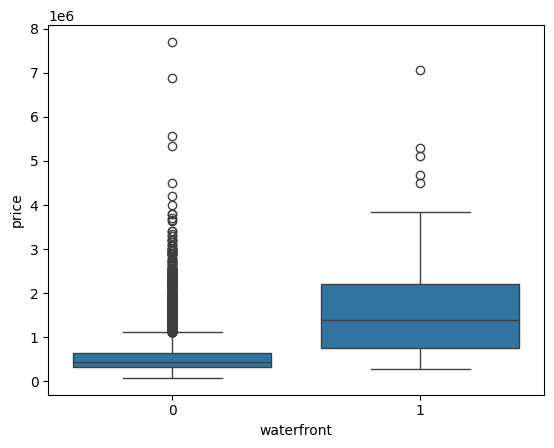

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df) # it shows that waterfront has high prices

**Data Featuring**

In [ ]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:
df.drop(['id','yr_built','yr_renovated','zipcode'],axis=1,inplace=True)

In [ ]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 

Date Feature Engineering

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,12,2014


In [ ]:
df.drop('date', inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  month          21597 non-null  int64  
 17  year           21597 non-null  int64  
dtypes: flo

<Axes: xlabel='year', ylabel='price'>

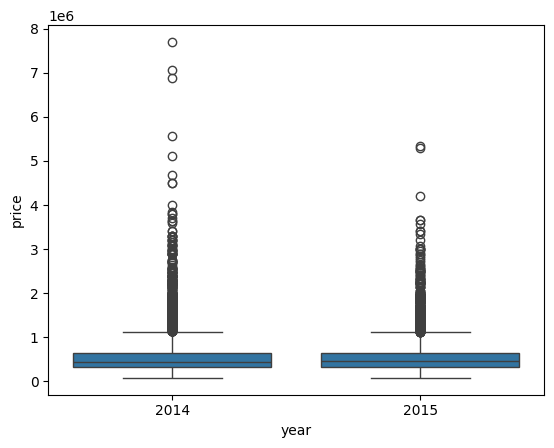

In [ ]:
sns.boxplot(x='year',y='price',data=df)

<Axes: xlabel='month', ylabel='price'>

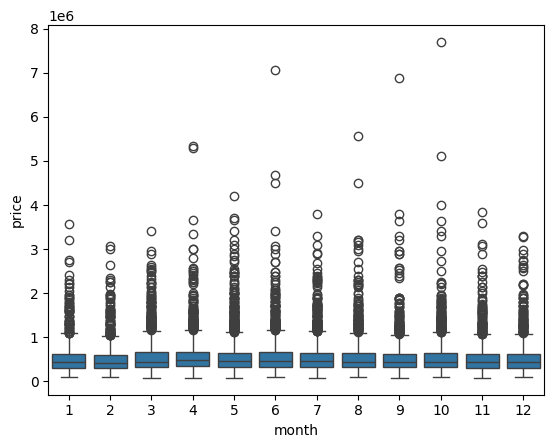

In [ ]:
sns.boxplot(x='month',y='price',data=df)

In [ ]:
df.groupby('month').mean()['price']

,price
month,
1,525963.251534
2,508520.051323
3,544057.683200
4,562215.615074
5,550849.746893
6,557534.318182
7,544892.161013
8,536655.212481
9,529723.517787


<Axes: xlabel='month'>

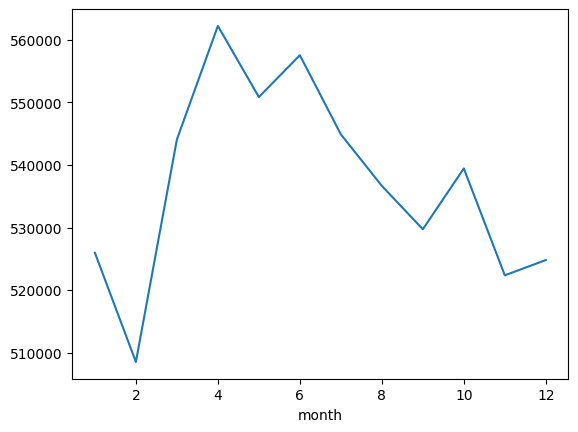

In [ ]:
df.groupby('month').mean()['price'].plot()

In [ ]:
df.groupby('year').mean()['price']

,price
year,
2014,539350.911777
2015,542279.005878


In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month',
       'year'],
      dtype='object')

In [ ]:
df.dtypes

,0
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64
grade,int64


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('price',axis=1)
y=df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**PreProcessing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_train.shape

(16197, 17)

In [ ]:
X_test.shape

(5400, 17)

**Model Creation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
#model
model = Sequential()

#layers
model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

**Model Training**

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 437487337472.0000 - val_loss: 425860071424.0000
Epoch 2/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 429188972544.0000 - val_loss: 421305417728.0000
Epoch 3/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 406993993728.0000 - val_loss: 374854189056.0000
Epoch 4/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 350579621888.0000 - val_loss: 227137290240.0000
Epoch 5/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 177127981056.0000 - val_loss: 106223460352.0000
Epoch 6/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 97038180352.0000 - val_loss: 97530552320.0000
Epoch 7/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 90177183744.0000 - val_loss: 95855804416.0000
Epoch 8/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 86038126592.0000 - val_loss: 94157479936.0000
Epoch 9/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87668359168.0000 - val_loss: 92402606080.0000
Epoch 10/400
127/127 ━━━━━━

In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses.head(2)

,loss,val_loss
0,4.271782e+11,4.258601e+11
1,4.259464e+11,4.213054e+11


<Axes: >

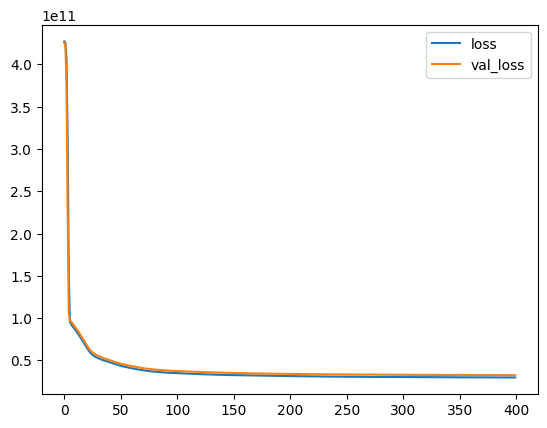

In [ ]:
losses.plot()

**Evaluation of Test Data**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, root_mean_squared_error

In [ ]:
predictions = model.predict(X_test)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
mean_absolute_error(y_test,predictions)

110031.32777054398

In [ ]:
root_mean_squared_error(y_test,predictions)

180342.17069594515

In [ ]:
explained_variance_score(y_test,predictions)

0.763037679091592

In [ ]:
print(df['price'].mean())
print(df['price'].median())

540296.5735055795
450000.0


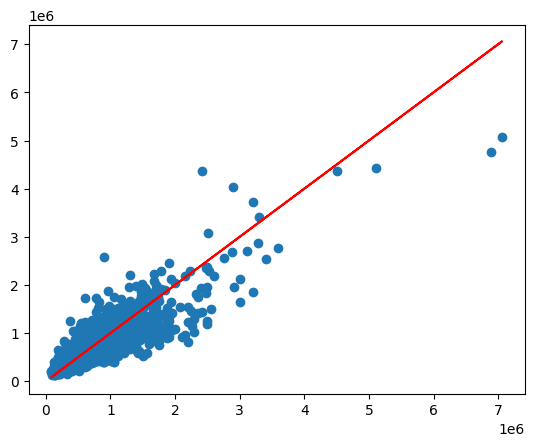

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

**Prediction**

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,17))

In [ ]:
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.57149751, 0.21760797, 0.16193426, 0.00574235,
        0.81818182, 0.        ]])

In [ ]:
model.predict(single_house).tolist()[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


282199.90625

In [ ]:
df.iloc[0][0]

np.float64(221900.0)

Now we can have a look to our predictions. I predicted the price of first house to be 282199, but the real price is 221900. So, I got a difference of **60299** in price. This happens because in our dataset we have very wild data, some data in the dataset is too far. So, now I'll eleminate that far way data so, that I can have better prediction results with my model.

**Now using df2**

In [ ]:
df2.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,12,2014


In [ ]:
df2.drop(['id','yr_built','yr_renovated','zipcode'],axis=1,inplace=True)

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2['month'] = df2['date'].apply(lambda date:date.month)
df2['year'] = df2['date'].apply(lambda date:date.year)
df2.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month,year
11255,2015-02-09,1600000.0,3,2.75,3040,21052,2.0,0,0,4,10,3040,0,47.6380,-122.225,2950,21052,2,2015
12088,2014-06-01,1600000.0,5,3.00,3640,8239,2.0,0,3,3,10,2540,1100,47.5842,-122.111,3330,10643,6,2014


In [ ]:
df2.drop('date', inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  month          21597 non-null  int64  
 17  year           21597 non-null  int64  
dtypes: flo

In [ ]:
X=df2.drop('price',axis=1)
y=df2['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test= scaler.transform(X_test)

In [ ]:
#model
model = Sequential()

#layers
model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 317892493312.0000 - val_loss: 323726835712.0000
Epoch 2/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 322818441216.0000 - val_loss: 317023485952.0000
Epoch 3/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301865992192.0000 - val_loss: 252951920640.0000
Epoch 4/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 214239674368.0000 - val_loss: 89801539584.0000
Epoch 5/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64327741440.0000 - val_loss: 42068013056.0000
Epoch 6/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 41564942336.0000 - val_loss: 41005785088.0000
Epoch 7/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 40935374848.0000 - val_loss: 39995584512.0000
Epoch 8/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38736166912.0000 - val_loss: 38956429312.0000
Epoch 9/400
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39086870528.0000 - val_loss: 37926359040.0000
Epoch 10/400
125/125 ━━━━━━━━━

In [ ]:
losses2=pd.DataFrame(model.history.history)

<Axes: >

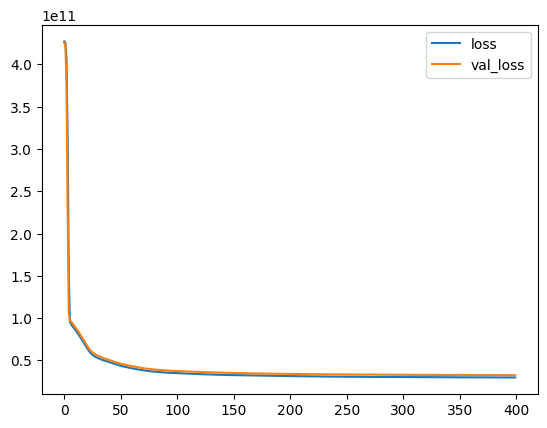

In [ ]:
losses.plot()

In [ ]:
predict = model.predict(X_test)

166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
print(root_mean_squared_error (y_test,predict))
print(mean_absolute_error(y_test,predict))

138146.52411828085
97685.78905511857


In [ ]:
explained_variance_score(y_test,predict)

0.7083171962679724

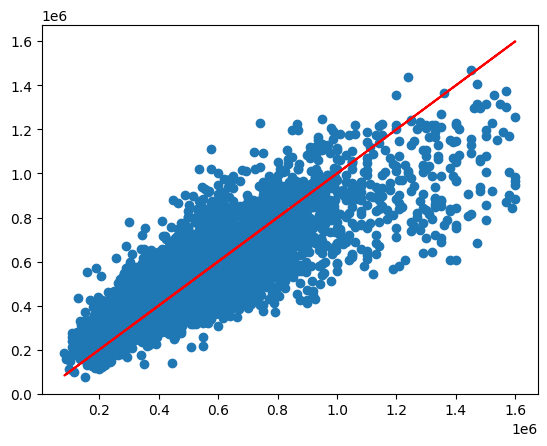

In [ ]:
# Our predictions
plt.scatter(y_test,predict)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
single_house = df2.drop('price',axis=1).iloc[10]
single_house = scaler.transform(single_house.values.reshape(-1,17))

In [ ]:
model.predict(single_house).tolist()[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


654548.9375

In [ ]:
df2.iloc[10][0].tolist()

662500.0